In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Annual Customer Activity Growth Analysis

In [4]:
# Membuat dataframe dari data yang diberikan
data = {
    "year": [2016, 2017, 2018],
    "active customer": [109, 3758, 5401],
    "new customer": [326, 43708, 52062],
    "customer with repeat order": [3, 1111, 1046],
    "avg order freq": [1.0092, 1.0280, 1.0215]
}
df = pd.DataFrame(data)
df

,year,active customer,new customer,customer with repeat order,avg order freq
0,2016,109,326,3,1.0092
1,2017,3758,43708,1111,1.0280
2,2018,5401,52062,1046,1.0215


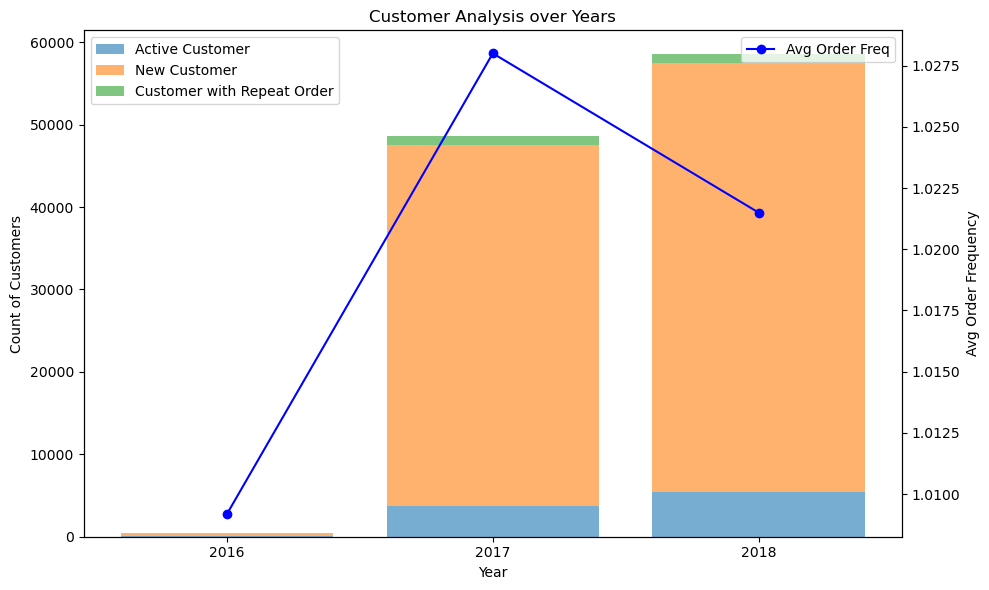

In [5]:
# Plotting data
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(df["year"].astype(str), df["active customer"], label="Active Customer", alpha=0.6)
ax1.bar(df["year"].astype(str), df["new customer"], label="New Customer", alpha=0.6, bottom=df["active customer"])
ax1.bar(df["year"].astype(str), df["customer with repeat order"], label="Customer with Repeat Order", alpha=0.6, bottom=[i+j for i,j in zip(df["active customer"], df["new customer"])])

ax1.set_xlabel('Year')
ax1.set_ylabel('Count of Customers')
ax1.set_title('Customer Analysis over Years')

ax2 = ax1.twinx()
ax2.plot(df["year"].astype(str), df["avg order freq"], color="blue", marker="o", label="Avg Order Freq")
ax2.set_ylabel('Avg Order Frequency')

fig.tight_layout()
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()


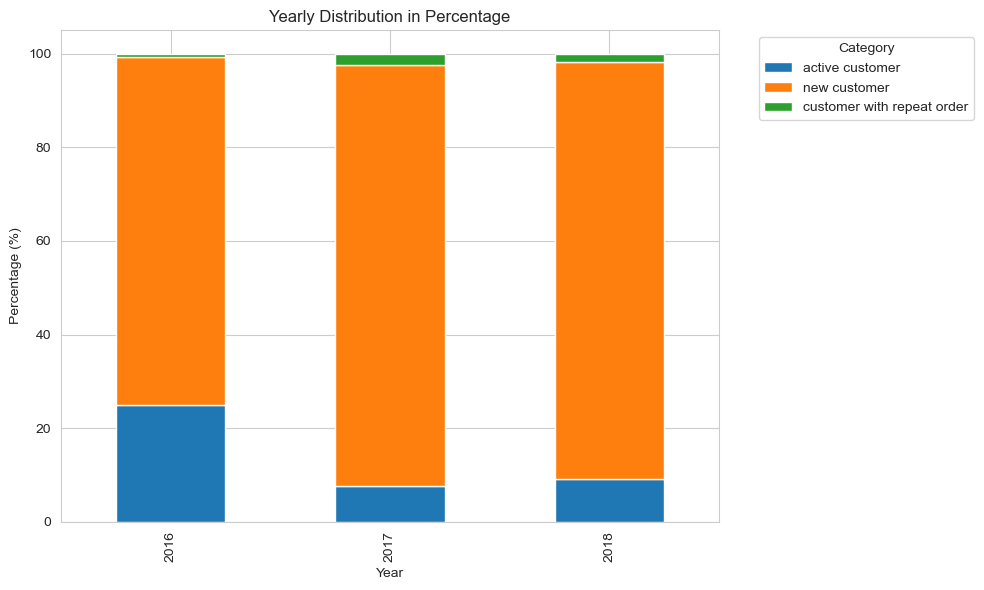

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    "year": [2016, 2017, 2018],
    "active customer": [109, 3758, 5401],
    "new customer": [326, 43708, 52062],
    "customer with repeat order": [3, 1111, 1046]
}

df = pd.DataFrame(data)

# Mengubah data menjadi persentase
df_percentage = df[df.columns[1:]].div(df[df.columns[1:]].sum(axis=1), axis=0) * 100
df_percentage['year'] = df['year']

# Plotting
fig, ax = plt.subplots(figsize=(10,6))

df_percentage.set_index('year').plot(kind='bar', stacked=True, ax=ax)

plt.title('Yearly Distribution in Percentage')
plt.ylabel('Percentage (%)')
plt.xlabel('Year')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Annual Product Category Quality Analysis

In [11]:
data = {
    'year': [2016, 2017, 2018],
    'total_revenue': [46653.74, 6921535.24, 8451584.77],
    'cancel_orders_count': [26, 265, 334],
    'top_category_revenue': ['furniture_decor', 'bed_bath_table', 'health_beauty'],
    'top_category_revenue_amount': [6899.35, 580949.2, 866810.34],
    'most_canceled_category': ['toys', 'sports_leisure', 'health_beauty'],
    'most_canceled_count': [3, 25, 27]
}

df2 = pd.DataFrame(data)
df2

,year,total_revenue,cancel_orders_count,top_category_revenue,top_category_revenue_amount,most_canceled_category,most_canceled_count
0,2016,46653.74,26,furniture_decor,6899.35,toys,3
1,2017,6921535.24,265,bed_bath_table,580949.20,sports_leisure,25
2,2018,8451584.77,334,health_beauty,866810.34,health_beauty,27


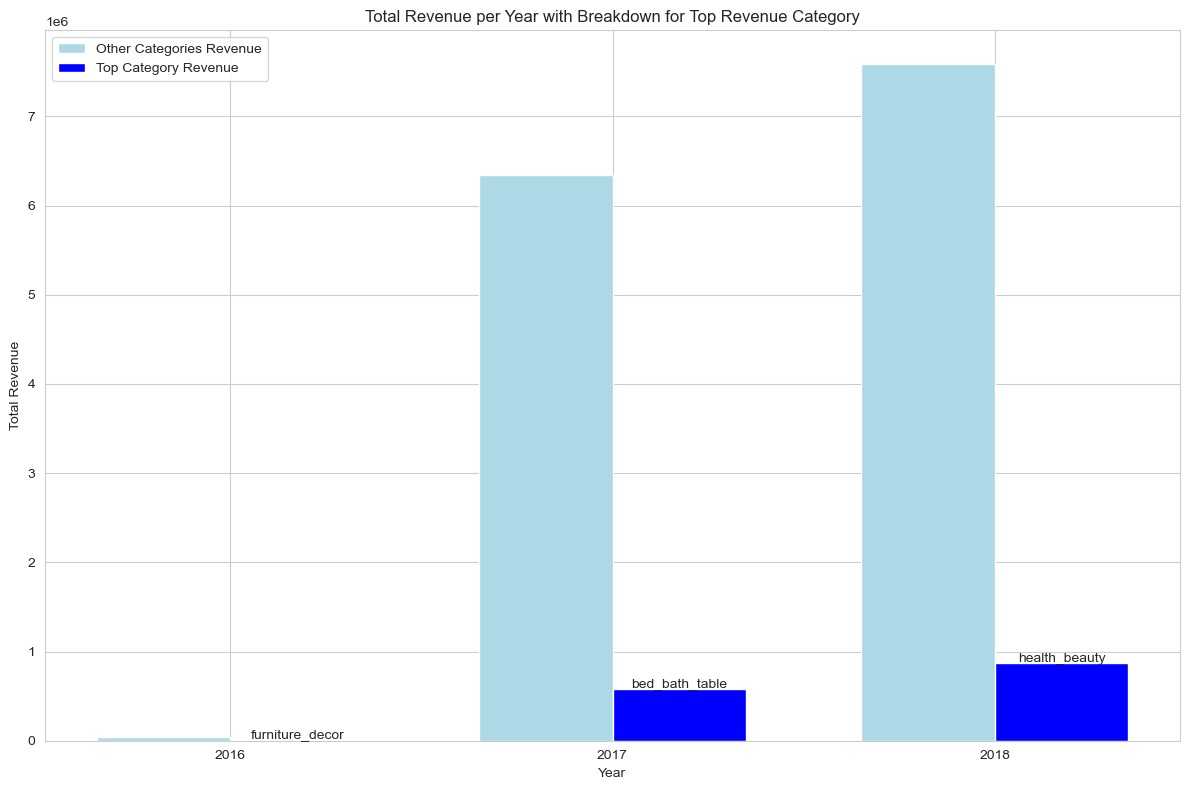

In [31]:
import matplotlib.pyplot as plt

# Data
data = {
    'year': [2016, 2017, 2018],
    'total_revenue': [46653.74, 6921535.24, 8451584.77],
    'top_category_revenue': ['furniture_decor', 'bed_bath_table', 'health_beauty'],
    'top_category_revenue_amount': [6899.35, 580949.2, 866810.34]
}

# Menghitung revenue selain dari top category
data['other_revenue'] = [data['total_revenue'][i] - data['top_category_revenue_amount'][i] for i in range(len(data['year']))]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = range(len(data['year']))

# Bar plot untuk total revenue selain dari top category
bars1 = ax.bar(index, data['other_revenue'], bar_width, color='lightblue', label='Other Categories Revenue')

# Bar plot untuk revenue dari top category
bars2 = ax.bar([i + bar_width for i in index], data['top_category_revenue_amount'], bar_width, color='blue', label='Top Category Revenue')

# Add annotations for top_category_revenue above the bars
for i, bar in enumerate(bars2):
    ax.annotate(data['top_category_revenue'][i],
                (bar.get_x() + bar.get_width() / 2, bar.get_height() + 50000),  # Adjust the vertical position
                ha='center', va='center', fontsize=10)

# Setting the title, labels, and legend
ax.set_title('Total Revenue per Year with Breakdown for Top Revenue Category')
ax.set_xlabel('Year')
ax.set_ylabel('Total Revenue')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(data['year'])
ax.legend()

plt.tight_layout()
plt.show()

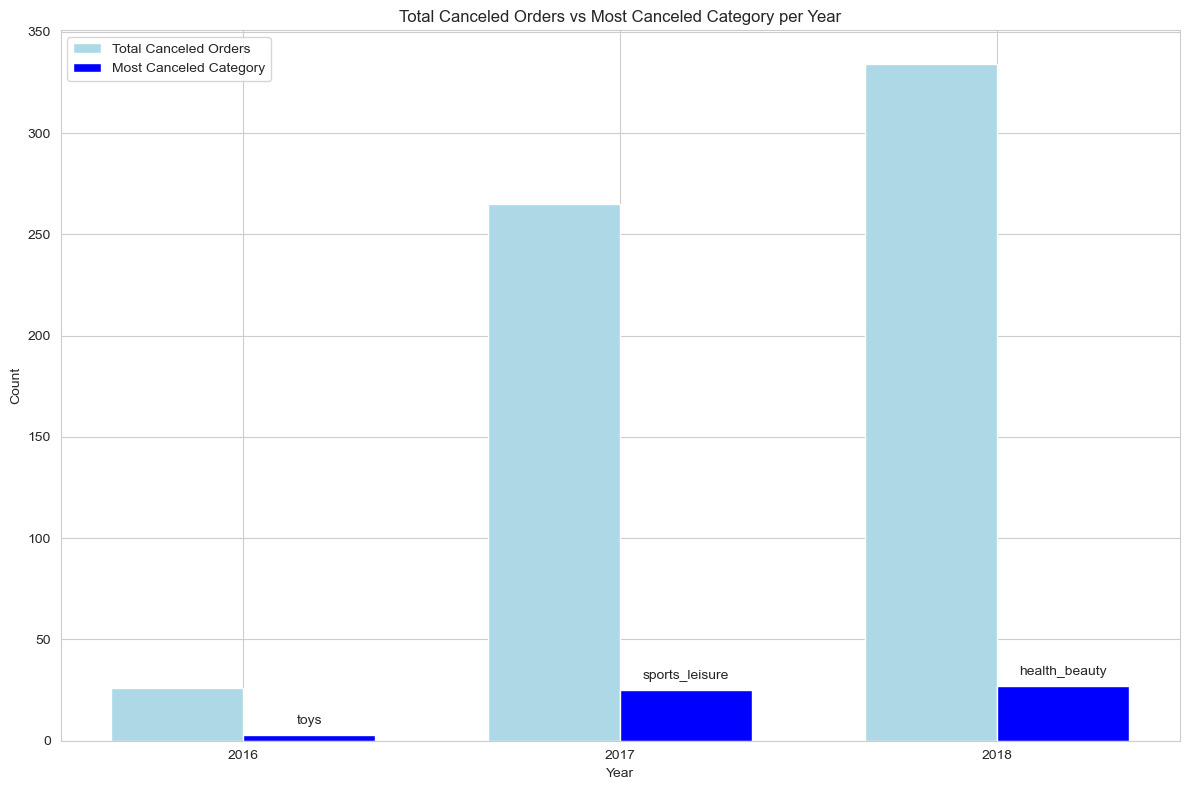

In [23]:
import matplotlib.pyplot as plt

# Data
data = {
    'year': [2016, 2017, 2018],
    'cancel_orders_count': [26, 265, 334],
    'most_canceled_category': ['toys', 'sports_leisure', 'health_beauty'],
    'most_canceled_count': [3, 25, 27]
}

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = range(len(data['year']))

# Bar plot untuk cancel_orders_count
bars1 = ax.bar(index, data['cancel_orders_count'], bar_width, color='lightblue', label='Total Canceled Orders')

# Bar plot untuk most_canceled_count
bars2 = ax.bar([i + bar_width for i in index], data['most_canceled_count'], bar_width, color='blue', label=f'Most Canceled Category')

# Add annotations
for i, bar in enumerate(bars2):
    ax.annotate(data['most_canceled_category'][i],
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=10)

# Setting the title, labels, and legend
ax.set_title('Total Canceled Orders vs Most Canceled Category per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(data['year'])
ax.legend()

plt.tight_layout()
plt.show()

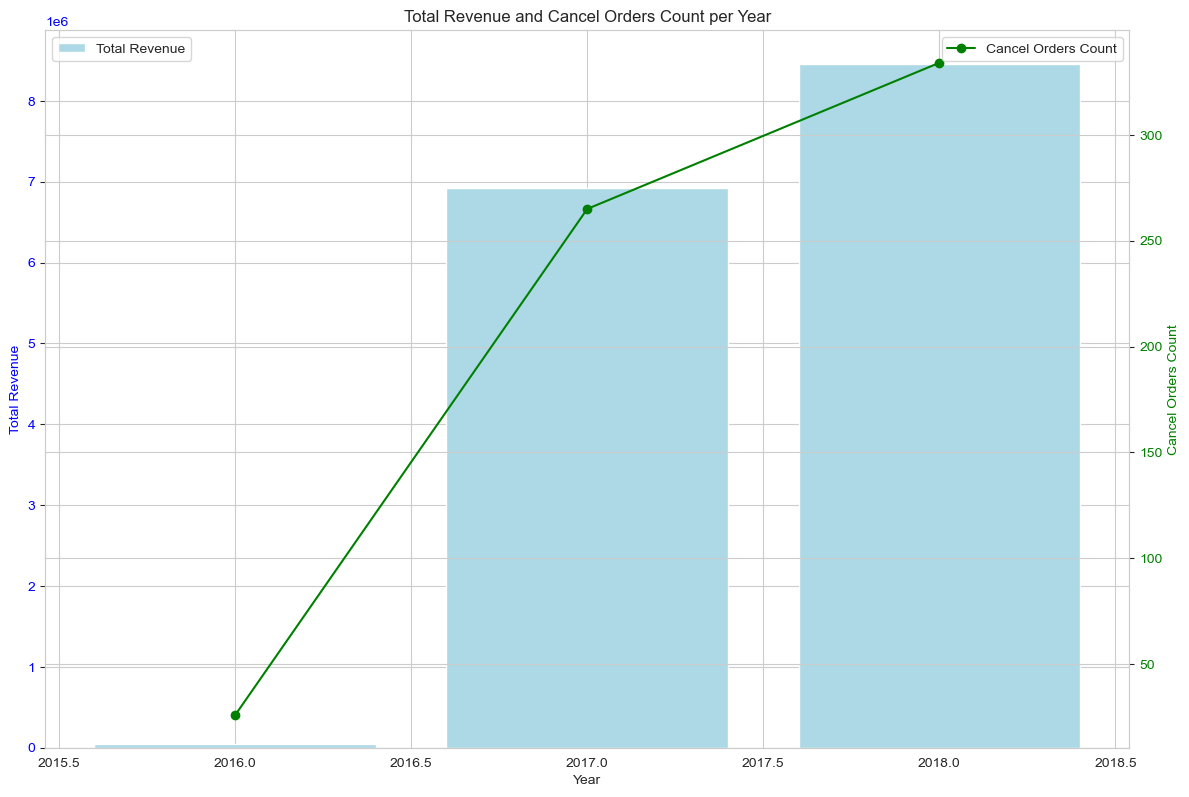

In [37]:
import matplotlib.pyplot as plt

# Data
data = {
    'year': [2016, 2017, 2018],
    'total_revenue': [46653.74, 6921535.24, 8451584.77],
    'cancel_orders_count': [26, 265, 334]
}

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot total_revenue with ax1
ax1.bar(data['year'], data['total_revenue'], color='lightblue', label='Total Revenue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Use twinx() to create the second axis object ax2
ax2 = ax1.twinx()
ax2.plot(data['year'], data['cancel_orders_count'], color='green', marker='o', label='Cancel Orders Count')
ax2.set_ylabel('Cancel Orders Count', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set the title and show the legend
fig.tight_layout()
plt.title('Total Revenue and Cancel Orders Count per Year')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# Analysis of Annual Payment Type Usage

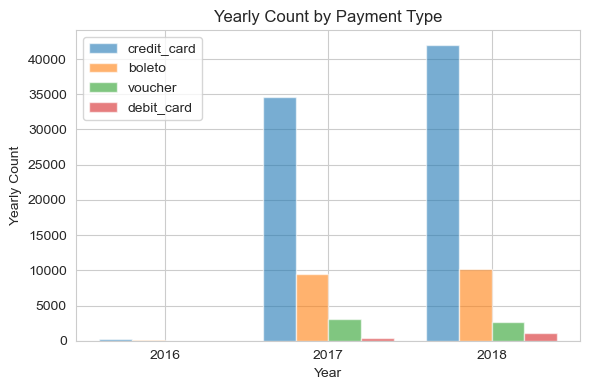

In [42]:
import matplotlib.pyplot as plt

# Data
years = [2016, 2017, 2018]
payment_types = ['credit_card', 'boleto', 'voucher', 'debit_card']
yearly_counts = {
    'credit_card': [258, 34568, 41969],
    'boleto': [63, 9508, 10213],
    'voucher': [23, 3027, 2725],
    'debit_card': [2, 422, 1105]
}

fig, ax = plt.subplots(figsize=(6, 4))

# Bar plot for yearly_counts
width = 0.2  # width of the bars
positions = list(range(len(years)))  # positions for the bars

# Iterating over payment_types to plot bars for each payment_type
for i, payment_type in enumerate(payment_types):
    ax.bar([pos + width * i for pos in positions], yearly_counts[payment_type], width, label=payment_type, alpha=0.6)

# Setting the title, labels, and legend
ax.set_title('Yearly Count by Payment Type')
ax.set_xlabel('Year')
ax.set_ylabel('Yearly Count')
ax.set_xticks([pos + width * 1.5 for pos in positions])
ax.set_xticklabels(years)
ax.legend()

plt.tight_layout()
plt.show()

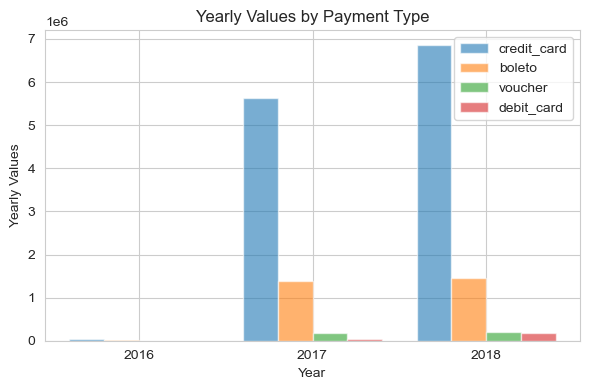

In [43]:
import matplotlib.pyplot as plt

# Data
years = [2016, 2017, 2018]
payment_types = ['credit_card', 'boleto', 'voucher', 'debit_card']
yearly_values = {
    'credit_card': [48562.48, 5637373.94, 6856147.77],
    'boleto': [9679.06, 1396063.37, 1463618.84],
    'voucher': [879.07, 172982.95, 205574.85],
    'debit_card': [241.73, 43326.47, 174421.59]
}

fig, ax = plt.subplots(figsize=(6, 4))

# Bar plot for yearly_counts
width = 0.2  # width of the bars
positions = list(range(len(years)))  # positions for the bars

# Iterating over payment_types to plot bars for each payment_type
for i, payment_type in enumerate(payment_types):
    ax.bar([pos + width * i for pos in positions], yearly_values[payment_type], width, label=payment_type, alpha=0.6)

# Setting the title, labels, and legend
ax.set_title('Yearly Values by Payment Type')
ax.set_xlabel('Year')
ax.set_ylabel('Yearly Values')
ax.set_xticks([pos + width * 1.5 for pos in positions])
ax.set_xticklabels(years)
ax.legend()

plt.tight_layout()
plt.show()